# Proyecto Final de Estadistica - KeepCoding

## BootCamp de BigData VIII

### Desarrollado por: Juan Carlos Guanoluisa


In [237]:
#import warnings
#warnings.filterwarnings('ignore')

### Cargamos la libreria Correspondiente para Graficos

In [238]:
library (dplyr)
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

### Cargar los datos en un dataframe llamado: airbnb

In [239]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = F)

### Mostrar las primeras 6 filas del dataframe

In [240]:
# summary(airbnb)

In [241]:
head(airbnb[1:6,])

Zipcode Neighbourhood.Cleansed Property.Type Room.Type       Accommodates
1 28004   Universidad            Apartment     Private room    2           
2 28004   Universidad            Apartment     Entire home/apt 6           
3 28004   Universidad            Apartment     Entire home/apt 3           
4 28004   Universidad            Loft          Entire home/apt 3           
5 28015   Universidad            Apartment     Entire home/apt 5           
6 28004   Universidad            Apartment     Entire home/apt 2           
  Bathrooms Bedrooms Beds Bed.Type
1 2         1        1    Real Bed
2 1         3        5    Real Bed
3 1         2        2    Real Bed
4 2         1        1    Real Bed
5 1         1        1    Real Bed
6 1         0        1    Real Bed
  Amenities                                                                                                                                                                                                                                                                                                                                                       
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  Square.Feet Price Review.Scores.Rating
1  NA         35     NA                 
2  NA         92     96                 
3  NA         55     91                 
4  NA         60    100                 
5 538         75     90                 
6  NA         55     95

Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [242]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")


In [243]:
names(airbnb)

[1] "Zipcode"                "Neighbourhood.Cleansed" "Property.Type"         
 [4] "Room.Type"              "Accommodates"           "Bathrooms"             
 [7] "Bedrooms"               "Beds"                   "Bed.Type"              
[10] "Amenities"              "Square.Feet"            "Price"                 
[13] "Review.Scores.Rating"

In [244]:
colnames(airbnb) <- c(newnames)

In [245]:
# head(airbnb[1:6,])
str(airbnb)

'data.frame':	13207 obs. of  13 variables:
 $ CodigoPostal  : chr  "28004" "28004" "28004" "28004" ...
 $ Barrio        : chr  "Universidad" "Universidad" "Universidad" "Universidad" ...
 $ TipoPropiedad : chr  "Apartment" "Apartment" "Apartment" "Loft" ...
 $ TipoAlquiler  : chr  "Private room" "Entire home/apt" "Entire home/apt" "Entire home/apt" ...
 $ MaxOcupantes  : int  2 6 3 3 5 2 7 3 2 4 ...
 $ NumBanyos     : num  2 1 1 2 1 1 5 1 1 2 ...
 $ NumDormitorios: int  1 3 2 1 1 0 1 1 1 2 ...
 $ NumCamas      : int  1 5 2 1 1 1 7 NA 1 2 ...
 $ TipoCama      : chr  "Real Bed" "Real Bed" "Real Bed" "Real Bed" ...
 $ Comodidades   : chr  "TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable "| __truncated__ "TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Drye"| __truncated__ "TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer

### Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

#### Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [246]:
# Asignamos 0 los valores NA en la columna Precio
#airbnb <- mutate_at(airbnb, c("PiesCuadrados"), ~replace(., is.na(.), 0))

airbnb$MetrosCuadrados <- airbnb$PiesCuadrados * 0.092903
summary(airbnb$MetrosCuadrados)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   10.03   35.12   60.02  480.03   12688 

### Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

#### Limpia los datos de la columna Codigo Postal

In [247]:
# Correjimos los datos erroneos

summary(table(airbnb$CodigoPostal))


Number of cases in table: 13207 
Number of factors: 1 

In [248]:
airbnb$CodigoPostal[airbnb$CodigoPostal == "-"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "28"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "27004"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "27013"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "20013"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "20126"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "2015"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "25008"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "28002\n28002"] <- "28002"
airbnb$CodigoPostal[airbnb$CodigoPostal == "28051\n28051"] <- "28051"
airbnb$CodigoPostal[airbnb$CodigoPostal == "Madrid 28004"] <- "28004"
airbnb$CodigoPostal[airbnb$CodigoPostal == "2815"] <- "28015"
airbnb$CodigoPostal[airbnb$CodigoPostal == "2804"] <- "28004"
airbnb$CodigoPostal[airbnb$CodigoPostal == "2805"] <- "28005"
airbnb$CodigoPostal[airbnb$CodigoPostal == "280013"] <- "28013"

# Asignamos 0 los valores NA en la columna Precio
airbnb <- mutate_at(airbnb, c("Precio"), ~replace(., is.na(.), 0))


### Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [249]:
table(airbnb$CodigoPostal)


      28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 
  439   231   171   185  1796  1195   218   206   338   216   384   250  2060 
28013 28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 
 1020   630   601    76   107    43   200   192    58    30    23    44   123 
28026 28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 
   93   122   263   110    73    27    33    89    45    59    67    65    77 
28039 28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 
  160    16    63    90   103    19   495    32    67     1     3    58    17 
28052 28053 28054 28055 28056 28058 28060 28094 28105 28850 
    1    85    12    12     1     1     1     1     1     1 

### ¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [250]:
CodPost <- airbnb %>%
    filter(!is.na(CodigoPostal) ) %>%
    count(CodigoPostal, sort = TRUE)

#typeof(CodPost)
colnames(CodPost) <- c("CodigoPostal", "Entradas")


print("Codigos Postales con MAS Entradas")
print(CodPost[1:5,])

print("Codigos Postales con MENOS Entradas")
print(CodPost[58:62,])


[1] "Codigos Postales con MAS Entradas"
  CodigoPostal Entradas
1        28012     2060
2        28004     1796
3        28005     1195
4        28013     1020
5        28014      630
[1] "Codigos Postales con MENOS Entradas"
   CodigoPostal Entradas
58        28058        1
59        28060        1
60        28094        1
61        28105        1
62        28850        1


### ¿Cuales son los barrios que hay en el código postal 28012?

In [251]:
barrios28012 <- airbnb %>%
    filter(CodigoPostal == "28012" ) %>%
    count(Barrio, sort = TRUE)

print("Son 11 Barrios y son los siguientes")
print(barrios28012["Barrio"])


[1] "Son 11 Barrios y son los siguientes"
            Barrio
1      Embajadores
2              Sol
3           Cortes
4  Palos de Moguer
5          Palacio
6          Acacias
7      Universidad
8         Arapiles
9           Atocha
10        Delicias
11            Goya


### ¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [252]:
entradasBarrios28012 <- airbnb %>%
    filter(CodigoPostal == "28012" ) %>%
    count(Barrio, sort = TRUE)

# typeof(entradasBarrios28012)
colnames(entradasBarrios28012) <- c("Barrio", "Entradas")

print(entradasBarrios28012)



            Barrio Entradas
1      Embajadores     1449
2              Sol      301
3           Cortes      216
4  Palos de Moguer       46
5          Palacio       27
6          Acacias       13
7      Universidad        4
8         Arapiles        1
9           Atocha        1
10        Delicias        1
11            Goya        1


### ¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [253]:
cuantosBarriosAirbnb <- airbnb %>%
    count(Barrio, sort = TRUE)

print(paste("La cantidad de Barrios que existen en el DataSet Son : ",paste(dim(cuantosBarriosAirbnb["Barrio"])[1])))



[1] "La cantidad de Barrios que existen en el DataSet Son :  125"


In [254]:
print("Los Barrios son los siguientes: ")
print(cuantosBarriosAirbnb["Barrio"])

[1] "Los Barrios son los siguientes: "
                          Barrio
1                    Embajadores
2                    Universidad
3                        Palacio
4                            Sol
5                       Justicia
6                         Cortes
7                      Trafalgar
8                      Argüelles
9                Palos de Moguer
10                          Goya
11              Puerta del Angel
12                    Guindalera
13                      Arapiles
14                     Recoletos
15                       Almagro
16                       Acacias
17                    Gaztambide
18                      Pacífico
19                         Lista
20                      Delicias
21                Cuatro Caminos
22                       Chopera
23                         Ibiza
24                    Rios Rosas
25                   Prosperidad
26                    Castellana
27                     Jerónimos
28                      Imperial
29  

### ¿Cuales son los 5 barrios que tienen mayor número entradas?

In [255]:
entradasBarriosAirbnb <- airbnb %>%
    count(Barrio, sort = TRUE)

print("Los 5 Barrios con MAS Entradas")
colnames(entradasBarriosAirbnb) <- c("Barrio","Entradas")
print(entradasBarriosAirbnb[1:5,])


[1] "Los 5 Barrios con MAS Entradas"
       Barrio Entradas
1 Embajadores     1844
2 Universidad     1358
3     Palacio     1083
4         Sol      940
5    Justicia      785


### ¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [256]:
#gsub('\\.', '','120...12345')
#gsub('\\.', '','120...12345') |> as.numeric()
#as.numeric(gsub('\\.', '','120...12345'))

In [257]:
tiposAlquilerDiferentes <- airbnb %>%
    count(TipoAlquiler, sort = TRUE)
colnames(tiposAlquilerDiferentes) <- c("TipoAlquiler","Entradas")

print("Existen 3 Tipos de Alquiler")
print("------------------------------------------")
print(tiposAlquilerDiferentes)


[1] "Existen 3 Tipos de Alquiler"
[1] "------------------------------------------"
     TipoAlquiler Entradas
1 Entire home/apt     7903
2    Private room     5113
3     Shared room      191


### Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

In [258]:
options(repr.plot.height=6,repr.plot.width=10 , repr.plot.res = 200)

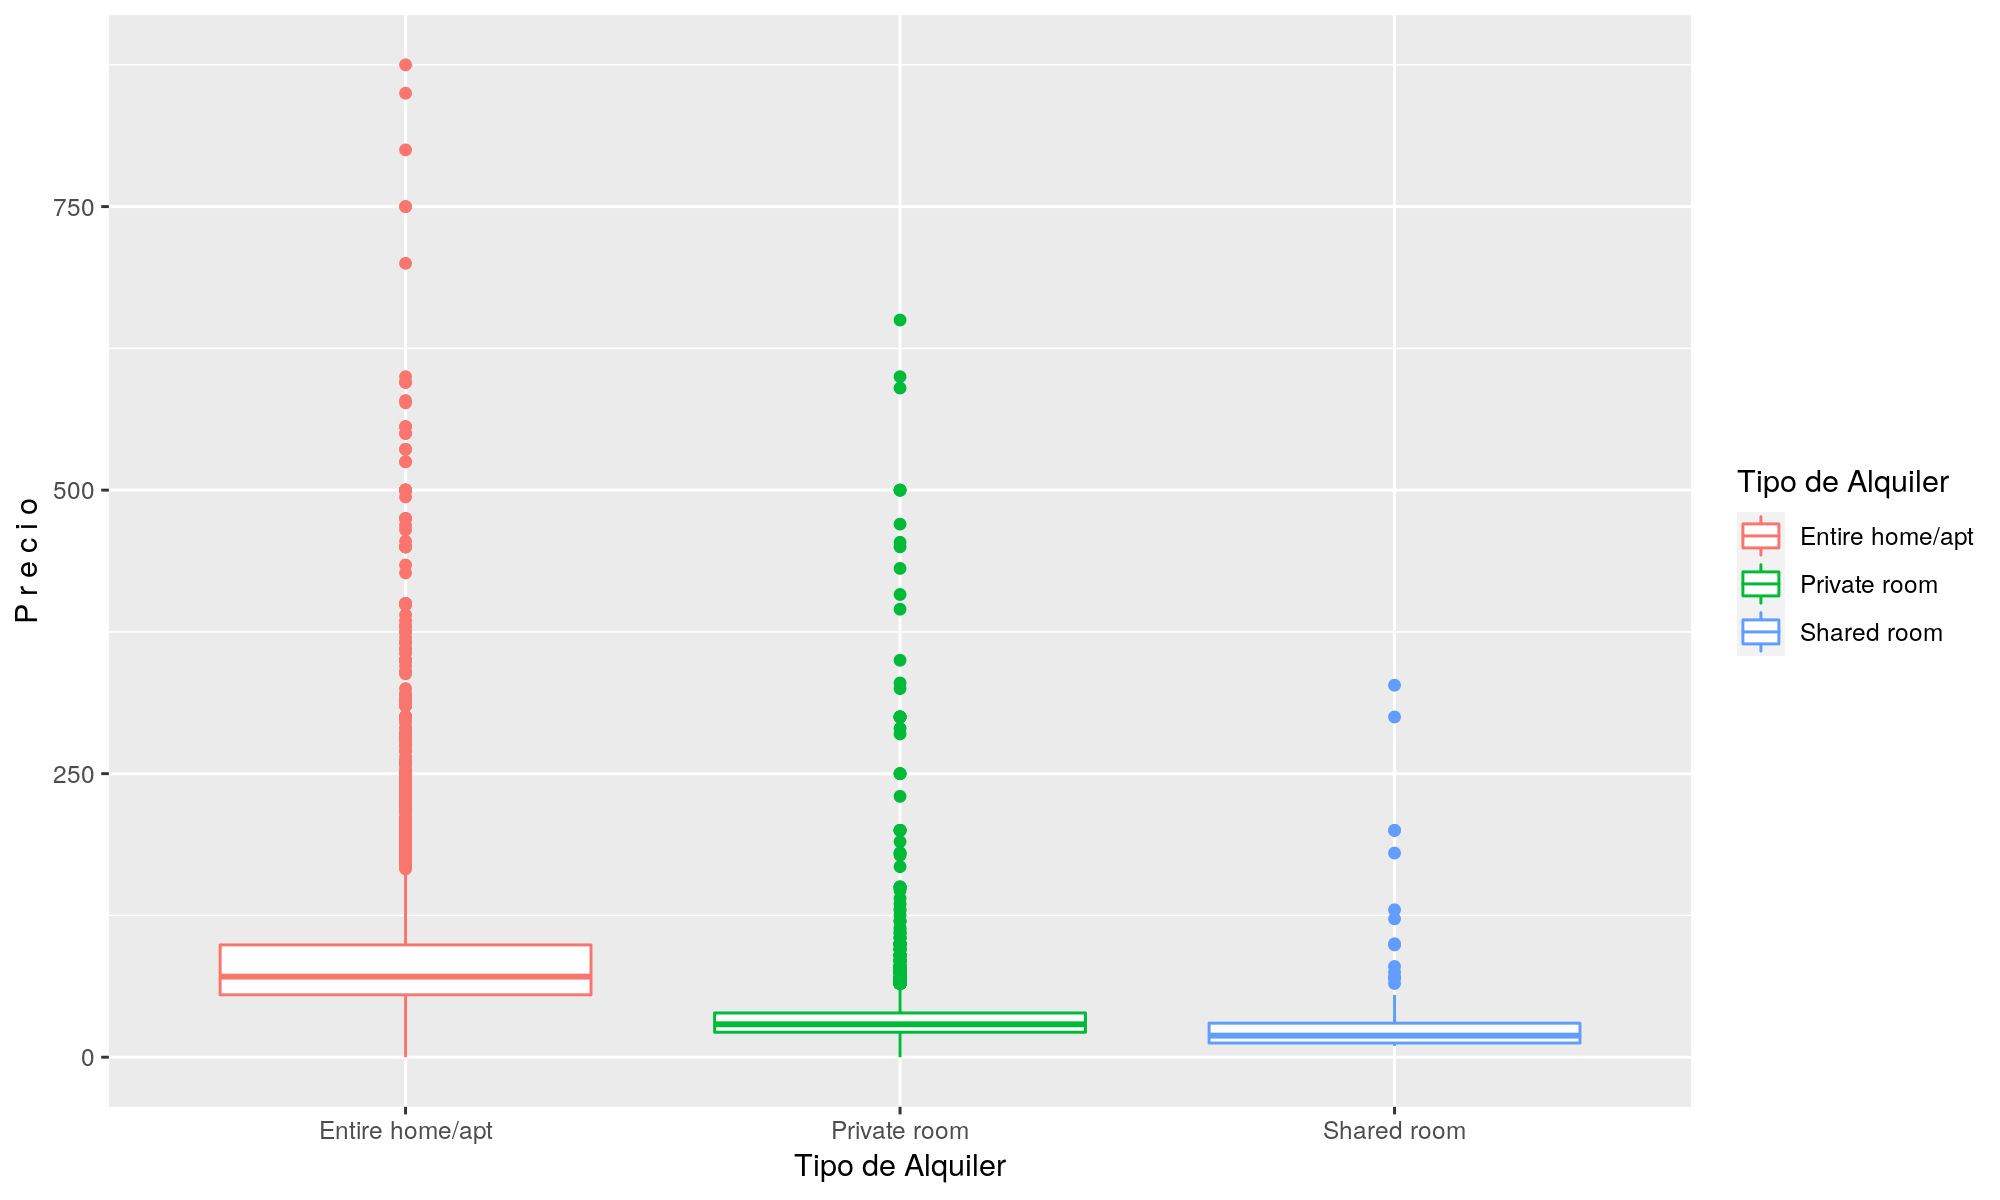

In [259]:
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+geom_boxplot()+
scale_color_discrete(name="Tipo de Alquiler")+xlab('Tipo de Alquiler')+ylab('P r e c i o')

### Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
#### ¿Con que test lo comprobarías?

In [260]:
precioPromedioTipoAlquiler <- airbnb %>%
    group_by(TipoAlquiler ) %>%
    summarize(PrecioMedio = mean(Precio, na.rm = TRUE))

print(precioPromedioTipoAlquiler)

# A tibble: 3 × 2
  TipoAlquiler    PrecioMedio
  <chr>                 <dbl>
1 Entire home/apt        87.2
2 Private room           34.2
3 Shared room            29.9


### Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
### *airbnb_entire*.
#### Estas serán las entradas que tienen un alquiler del piso completo.

In [261]:
airbnb_entire <- subset(airbnb, TipoAlquiler == "Entire home/apt" )
airbnb_entire <- mutate_at(airbnb_entire, c("Precio"), ~replace(., is.na(.), 0))

### ¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
#### Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [262]:
apartamentoEnteroBarrio <- airbnb_entire %>%
    filter(TipoPropiedad == "Apartment" ) %>%
    count(Barrio, sort = TRUE)
colnames(apartamentoEnteroBarrio) <- c("Barrio","Apartamentos")
print(apartamentoEnteroBarrio[1:5,])


       Barrio Apartamentos
1 Embajadores         1099
2 Universidad          897
3     Palacio          684
4         Sol          648
5      Cortes          528


In [263]:
#apartamentosAirbnb <- airbnb_entire %>%
#    group_by(TipoPropiedad ) %>%
#    summarize(PrecioMedio = mean(Precio, na.rm = TRUE))
#print(apartamentosAirbnb)

### ¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

### ¿Cual es su precio medio?

#### Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [264]:
apartamentosAirbnb <- airbnb_entire %>%
    filter(TipoPropiedad == "Apartment" ) %>%
    group_by(Barrio) %>%
    summarize(PrecioMedio = mean(Precio, na.rm = TRUE))

datosDf <- aggregate(apartamentosAirbnb[, 2], list(apartamentosAirbnb$Barrio), mean)
colnames(datosDf) <- c("Barrio","PrecioMedio")
datosDf <- datosDf[with(datosDf, order(-datosDf$PrecioMedio)), ] # Ordenamos directamente

datosDf[1:5,]

Barrio                     PrecioMedio
75 Palomas                    459.5000   
48 Fuentelareina              280.0000   
90 Recoletos                  165.5328   
26 Casco Histórico de Barajas 157.0000   
29 Castellana                 140.6818

### ¿Cuantos apartamentos hay en cada uno de esos barrios?

#### Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

#### Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [265]:
#typeof(datosDf)

apartamentosBarrioAirbnb <- airbnb_entire %>%
    count(Barrio, sort = TRUE)


df1 <- data.frame(t(sapply(apartamentoEnteroBarrio,c)))
df2 <- data.frame(t(sapply(datosDf,c)))

df_totalApartamentos <- merge(datosDf,apartamentoEnteroBarrio,by="Barrio", all=T)
colnames(df_totalApartamentos) <- c("Barrio", "PrecioMedio", "Frecuencia")

print(df_totalApartamentos)

                          Barrio PrecioMedio Frecuencia
1                       Abrantes    46.00000          3
2                        Acacias    68.53571         56
3                        Adelfas    70.48148         27
4                     Aeropuerto    38.00000          2
5                        Aguilas    54.50000          2
6               Alameda de Osuna   140.00000          2
7                        Almagro    99.86207         87
8                       Almenara    66.81818         22
9                    Almendrales    97.16667         12
10                        Aluche    55.88889          9
11                        Ambroz    34.50000          2
12              Apostol Santiago    73.25000          4
13                      Arapiles    70.04348         92
14                       Aravaca    66.00000          6
15                         Arcos    83.50000          2
16                     Argüelles    88.14062        128
17                        Atocha    60.57143    

### Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [266]:
barriosMayorPrecio <- df_totalApartamentos %>%
    filter(Frecuencia >= 100 )

barriosMayorPrecio <- barriosMayorPrecio[with(barriosMayorPrecio, order(-barriosMayorPrecio$PrecioMedio)), ]

barriosMayorPrecio[1:5,]

Barrio    PrecioMedio Frecuencia
8  Recoletos 165.53279   122       
4  Goya      112.16393   122       
9  Sol       100.99691   648       
5  Justicia   98.82099   486       
10 Trafalgar  94.07389   203

### Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

In [267]:
barrioRecoletos <- airbnb_entire %>%
    filter(Barrio == "Recoletos" )

barrioGoya <- airbnb_entire %>%
    filter(Barrio == "Goya" )

barrioSol <- airbnb_entire %>%
    filter(Barrio == "Sol" )

barrioJusticia <- airbnb_entire %>%
    filter(Barrio == "Justicia" )

barrioTrafalgar <- airbnb_entire %>%
    filter(Barrio == "Trafalgar" )



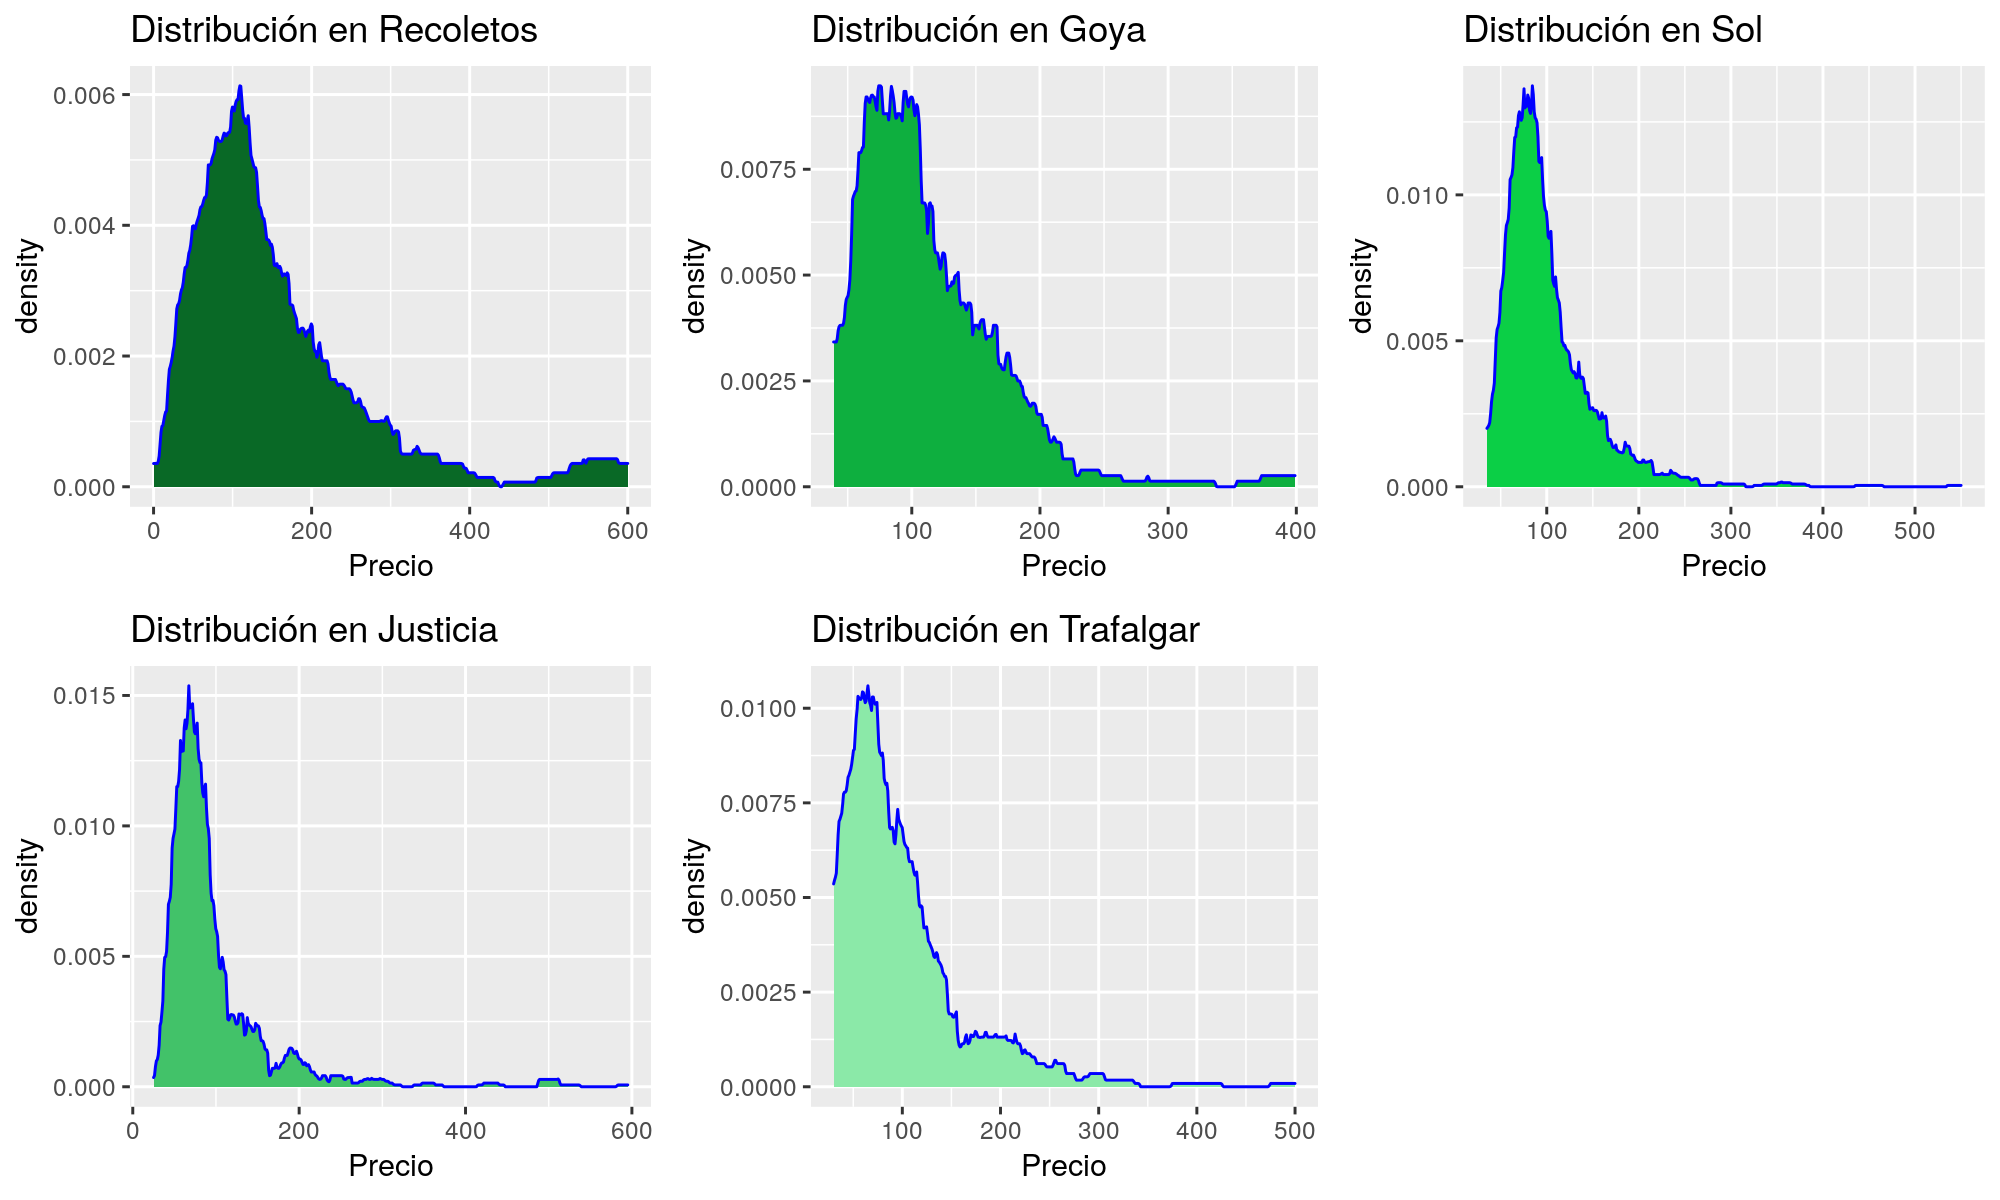

In [268]:
library(gridExtra)
options(repr.plot.height=6,repr.plot.width=10 , repr.plot.res = 200)


g1 <- ggplot(data=barrioRecoletos, aes(x=Precio)) +
      geom_density(kernel="rectangular", color='blue',fill="#096926") +
      labs(title = "Distribución en Recoletos") 

g2 <- ggplot(data=barrioGoya, aes(x=Precio)) +
      geom_density(kernel="rectangular", color='blue',fill="#0EAF3F") +
      labs(title = "Distribución en Goya") 

g3 <- ggplot(data=barrioSol, aes(x=Precio)) +
      geom_density(kernel="rectangular", color='blue',fill="#0BCF46") +
      labs(title = "Distribución en Sol") 

g4 <- ggplot(data=barrioJusticia, aes(x=Precio)) +
      geom_density(kernel="rectangular", color='blue',fill="#42C269") +
      labs(title = "Distribución en Justicia") 

g5 <- ggplot(data=barrioTrafalgar, aes(x=Precio)) +
      geom_density(kernel="rectangular", color='blue',fill="#8BE9A8") +
      labs(title = "Distribución en Trafalgar") 



# g1 <- ggplot(ride, aes(y=Distance))+geom_boxplot(color='blue')
# g2 <- ggplot(ride, aes(y=Moving.Time))+geom_boxplot(color='red')
grid.arrange(g1,g2,g3,g4,g5, nrow = 2)


### Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [269]:
# Asignamos 0 los valores NA en la columna Precio
airbnb_entire <- mutate_at(airbnb_entire, c("MetrosCuadrados"), ~replace(., is.na(.), 0))

metrosCuadradosAirbnb <- airbnb_entire %>%
    filter(TipoPropiedad == "Apartment" ) %>%
    group_by(Barrio) %>%
    summarize(TamañoMedio = mean(MetrosCuadrados, na.rm = TRUE))

df1 <- data.frame(t(sapply(metrosCuadradosAirbnb,c)))
df_totalMEtrosCuadrados <- merge(df_totalApartamentos,metrosCuadradosAirbnb,by="Barrio", all=T)
head(df_totalMEtrosCuadrados)



Barrio           PrecioMedio Frecuencia TamañoMedio
1 Abrantes          46.00000    3         0.000000   
2 Acacias           68.53571   56         3.480545   
3 Adelfas           70.48148   27         0.000000   
4 Aeropuerto        38.00000    2         0.000000   
5 Aguilas           54.50000    2         0.000000   
6 Alameda de Osuna 140.00000    2         0.000000

### Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

In [358]:
# str(airbnb_entire)

Warning message:
“Removed 132 rows containing non-finite values (stat_density).”
Warning message:
“Removed 139 rows containing non-finite values (stat_density).”
Warning message:
“Removed 641 rows containing non-finite values (stat_density).”
Warning message:
“Removed 517 rows containing non-finite values (stat_density).”
Warning message:
“Removed 216 rows containing non-finite values (stat_density).”


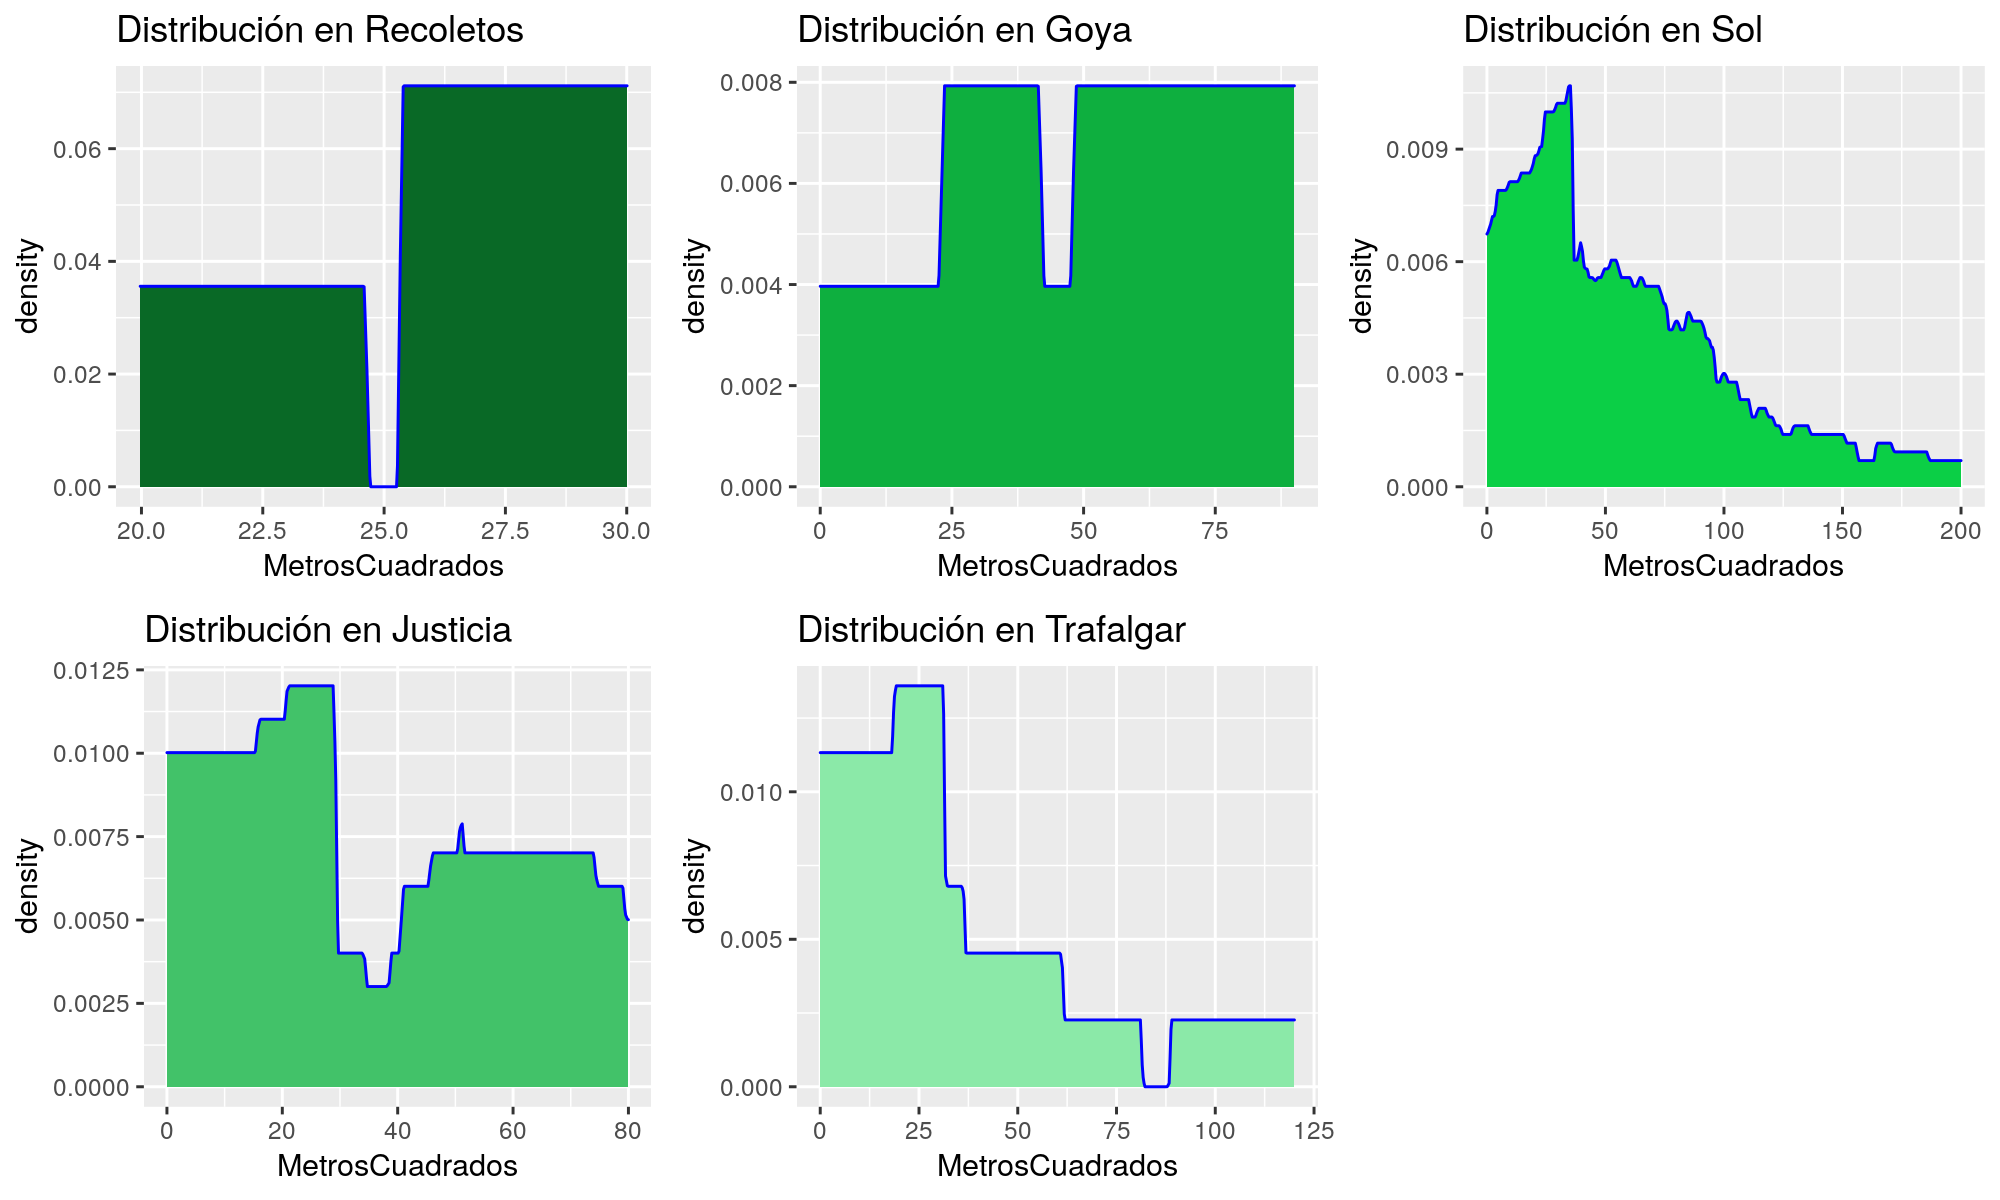

In [359]:
g6 <- ggplot(data=barrioRecoletos, aes(x=MetrosCuadrados)) +
      geom_density(kernel="rectangular", color='blue',fill="#096926") +
      labs(title = "Distribución en Recoletos") 

g7 <- ggplot(data=barrioGoya, aes(x=MetrosCuadrados)) +
      geom_density(kernel="rectangular", color='blue',fill="#0EAF3F") +
      labs(title = "Distribución en Goya") 

g8 <- ggplot(data=barrioSol, aes(x=MetrosCuadrados)) +
      geom_density(kernel="rectangular", color='blue',fill="#0BCF46") +
      labs(title = "Distribución en Sol") 

g9 <- ggplot(data=barrioJusticia, aes(x=MetrosCuadrados)) +
      geom_density(kernel="rectangular", color='blue',fill="#42C269") +
      labs(title = "Distribución en Justicia") 

g10 <- ggplot(data=barrioTrafalgar, aes(x=MetrosCuadrados)) +
      geom_density(kernel="rectangular", color='blue',fill="#8BE9A8") +
      labs(title = "Distribución en Trafalgar") 

grid.arrange(g6,g7,g8,g9,g10, nrow = 2)


### Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
#### ¿Que test habría que usar para comprobarlo?

### El Este de ANOVA

### Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

### Filtramos los datos

In [360]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
barrios_sol_filtrado <- barrio_sol %>%
    filter(MetrosCuadrados > 0 )


str(barrios_sol_filtrado)

'data.frame':	40 obs. of  14 variables:
 $ CodigoPostal   : chr  "28013" "28012" "28013" "28014" ...
 $ Barrio         : chr  "Sol" "Sol" "Sol" "Sol" ...
 $ TipoPropiedad  : chr  "Apartment" "Apartment" "Apartment" "Apartment" ...
 $ TipoAlquiler   : chr  "Entire home/apt" "Entire home/apt" "Entire home/apt" "Entire home/apt" ...
 $ MaxOcupantes   : int  4 4 2 8 4 10 4 2 3 2 ...
 $ NumBanyos      : num  1 1 1 2 1 2 1 1 1 1 ...
 $ NumDormitorios : int  1 1 1 4 1 2 1 1 0 1 ...
 $ NumCamas       : int  1 1 1 5 2 6 2 1 1 1 ...
 $ TipoCama       : chr  "Real Bed" "Real Bed" "Real Bed" "Real Bed" ...
 $ Comodidades    : chr  "TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Fam"| __truncated__ "TV,Cable TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,H"| __truncated__ "TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Fa"| 

### Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

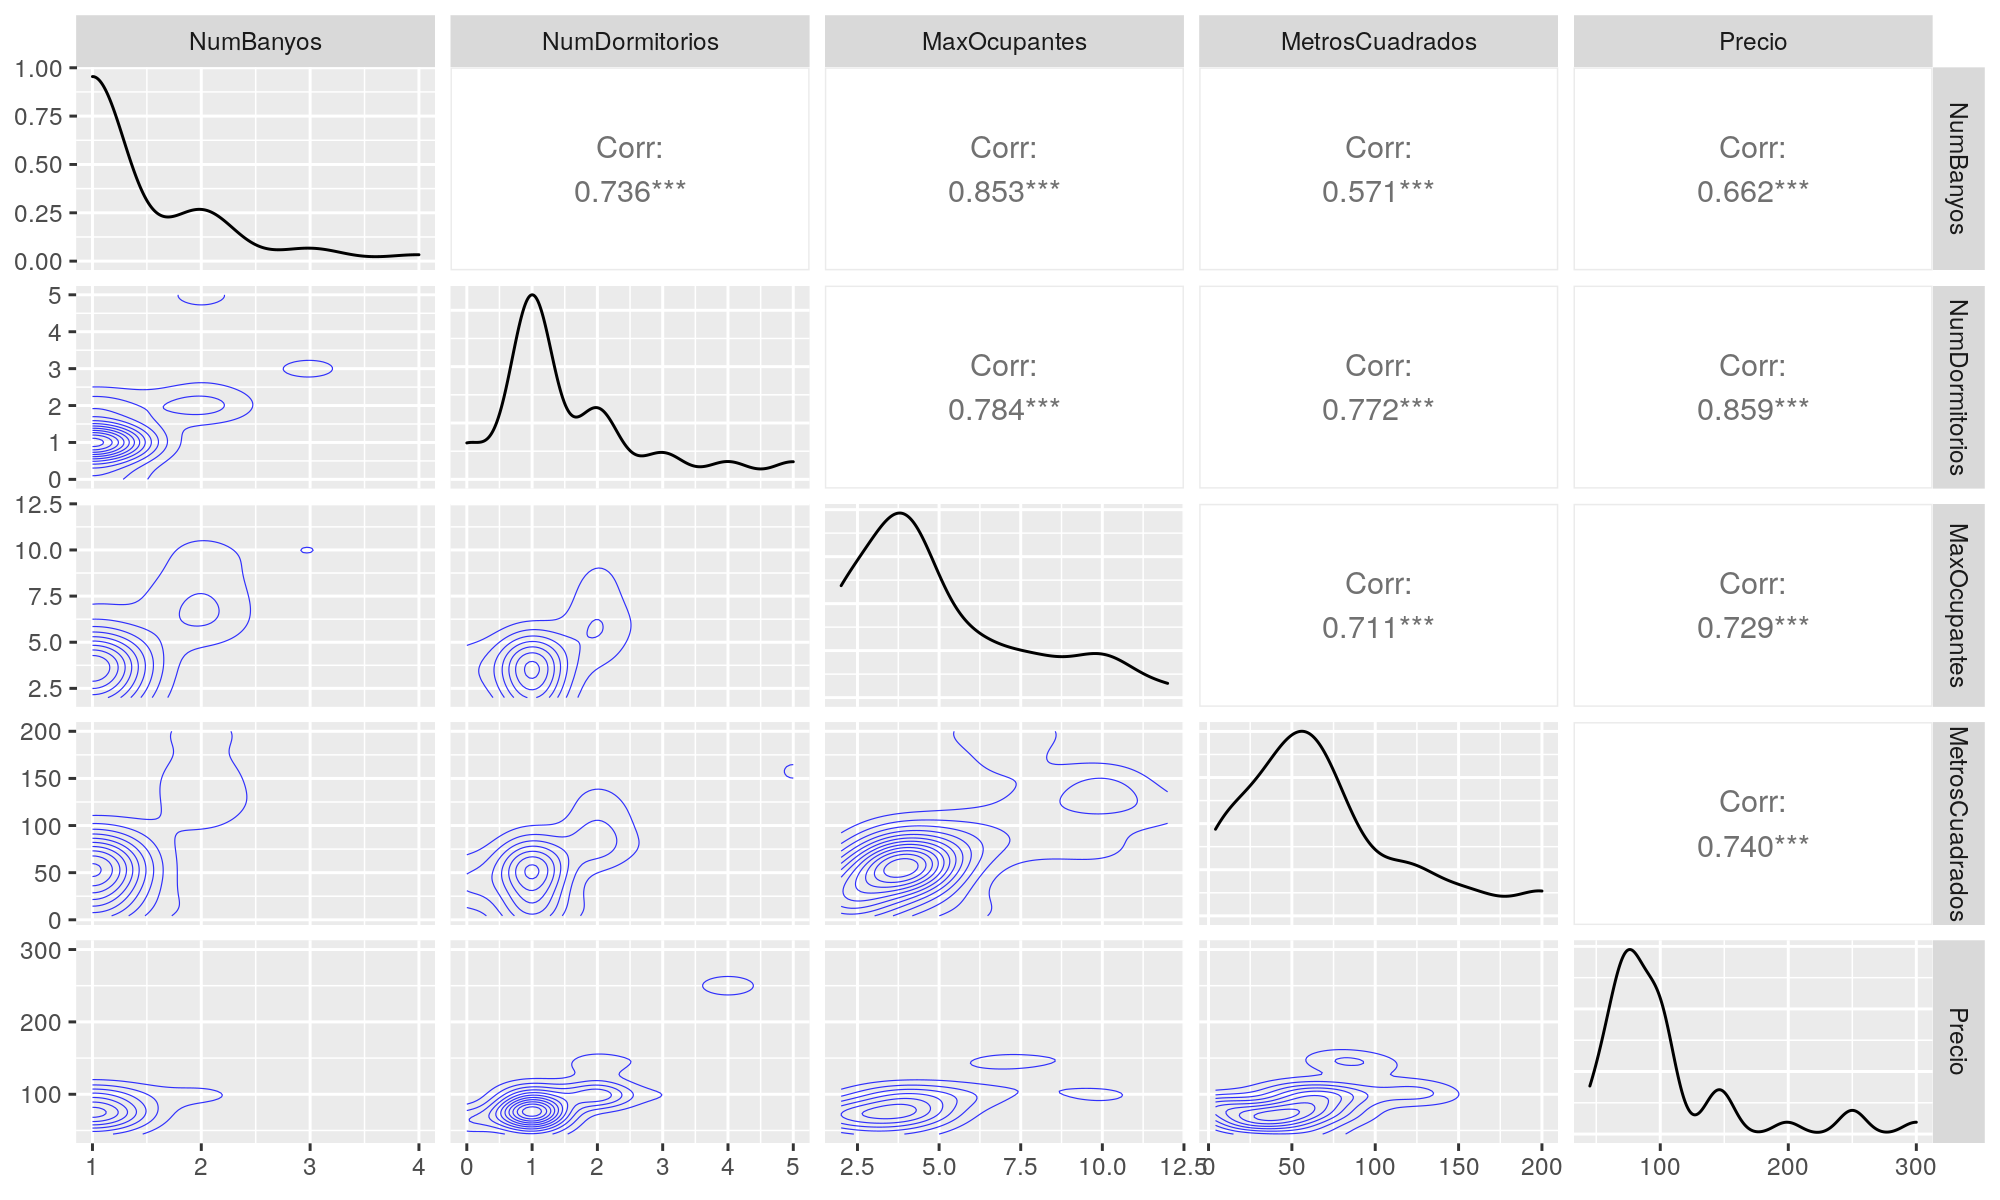

In [295]:
library(GGally)
options(repr.plot.height=6,repr.plot.width=10)
ggpairs(barrios_sol_filtrado[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados","Precio")],
       lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       #lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )


In [296]:
cr1<-cor(barrios_sol_filtrado$NumBanyos,barrios_sol_filtrado$NumDormitorios)
cr2<-cor(barrios_sol_filtrado$MetrosCuadrados,barrios_sol_filtrado$NumDormitorios)
cr3<-cor(barrios_sol_filtrado$MaxOcupantes,barrios_sol_filtrado$NumDormitorios)
cr4<-cor(barrios_sol_filtrado$Precio,barrios_sol_filtrado$NumDormitorios)

paste("La correlación de las variables NumDormitorios,NumBanyos es:",round(cr1,2))
paste("La correlación de las variables NumDormitorios,MetrosCuadrados es:",round(cr2,2))
paste("La correlación de las variables NumDormitorios,MaxOcupantes es:",round(cr3,2))
paste("La correlación de las variables NumDormitorios,Precio es:",round(cr4,2))



[1] "La correlación de las variables NumDormitorios,NumBanyos es: 0.74"

[1] "La correlación de las variables NumDormitorios,MetrosCuadrados es: 0.77"

[1] "La correlación de las variables NumDormitorios,MaxOcupantes es: 0.78"

[1] "La correlación de las variables NumDormitorios,Precio es: 0.86"

#### Creamos un modelo que nos va a permitir disponer de varios valores para los siguientes calculos

In [297]:
model <- lm(data=barrios_sol_filtrado, formula= NumDormitorios ~ NumBanyos+MetrosCuadrados+MaxOcupantes+Precio)
summary(model)


Call:
lm(formula = NumDormitorios ~ NumBanyos + MetrosCuadrados + MaxOcupantes + 
    Precio, data = barrios_sol_filtrado)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87557 -0.32530 -0.07435  0.31282  2.06110 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.589767   0.206033  -2.862 0.007052 ** 
NumBanyos        0.356196   0.247472   1.439 0.158939    
MetrosCuadrados  0.005641   0.002889   1.952 0.058932 .  
MaxOcupantes     0.042570   0.075428   0.564 0.576095    
Precio           0.010655   0.002640   4.036 0.000281 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5573 on 35 degrees of freedom
Multiple R-squared:  0.8176,	Adjusted R-squared:  0.7968 
F-statistic: 39.22 on 4 and 35 DF,  p-value: 1.789e-12


#### Definimos los intervalos de confianza

confint(model)

#### Definimos otro modelo con las variables recomendadas

In [299]:
model <- lm(data=barrios_sol_filtrado, formula= NumDormitorios ~ NumBanyos+MaxOcupantes+Precio)
summary(model)


Call:
lm(formula = NumDormitorios ~ NumBanyos + MaxOcupantes + Precio, 
    data = barrios_sol_filtrado)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93886 -0.26883 -0.03065  0.29578  2.43047 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.618988   0.213363  -2.901  0.00631 ** 
NumBanyos     0.275603   0.253355   1.088  0.28391    
MaxOcupantes  0.097652   0.072633   1.344  0.18721    
Precio        0.013112   0.002409   5.442 3.87e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5787 on 36 degrees of freedom
Multiple R-squared:  0.7977,	Adjusted R-squared:  0.7809 
F-statistic: 47.33 on 3 and 36 DF,  p-value: 1.409e-12


#### Confirmamos los intervalos de confianza

In [300]:
confint(model)

2.5 %        97.5 %     
(Intercept)  -1.051707851 -0.18626790
NumBanyos    -0.238223587  0.78943041
MaxOcupantes -0.049654336  0.24495767
Precio        0.008225995  0.01799878

In [301]:
model$coefficients

(Intercept)    NumBanyos MaxOcupantes       Precio 
 -0.61898787   0.27560341   0.09765167   0.01311239

In [302]:
#Intervalos de confianza

cnf_int <- confint(model)
cnf_int

2.5 %        97.5 %     
(Intercept)  -1.051707851 -0.18626790
NumBanyos    -0.238223587  0.78943041
MaxOcupantes -0.049654336  0.24495767
Precio        0.008225995  0.01799878

### Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

#### Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
#### para tener una matriz de correlación que tenga mayor sentido.


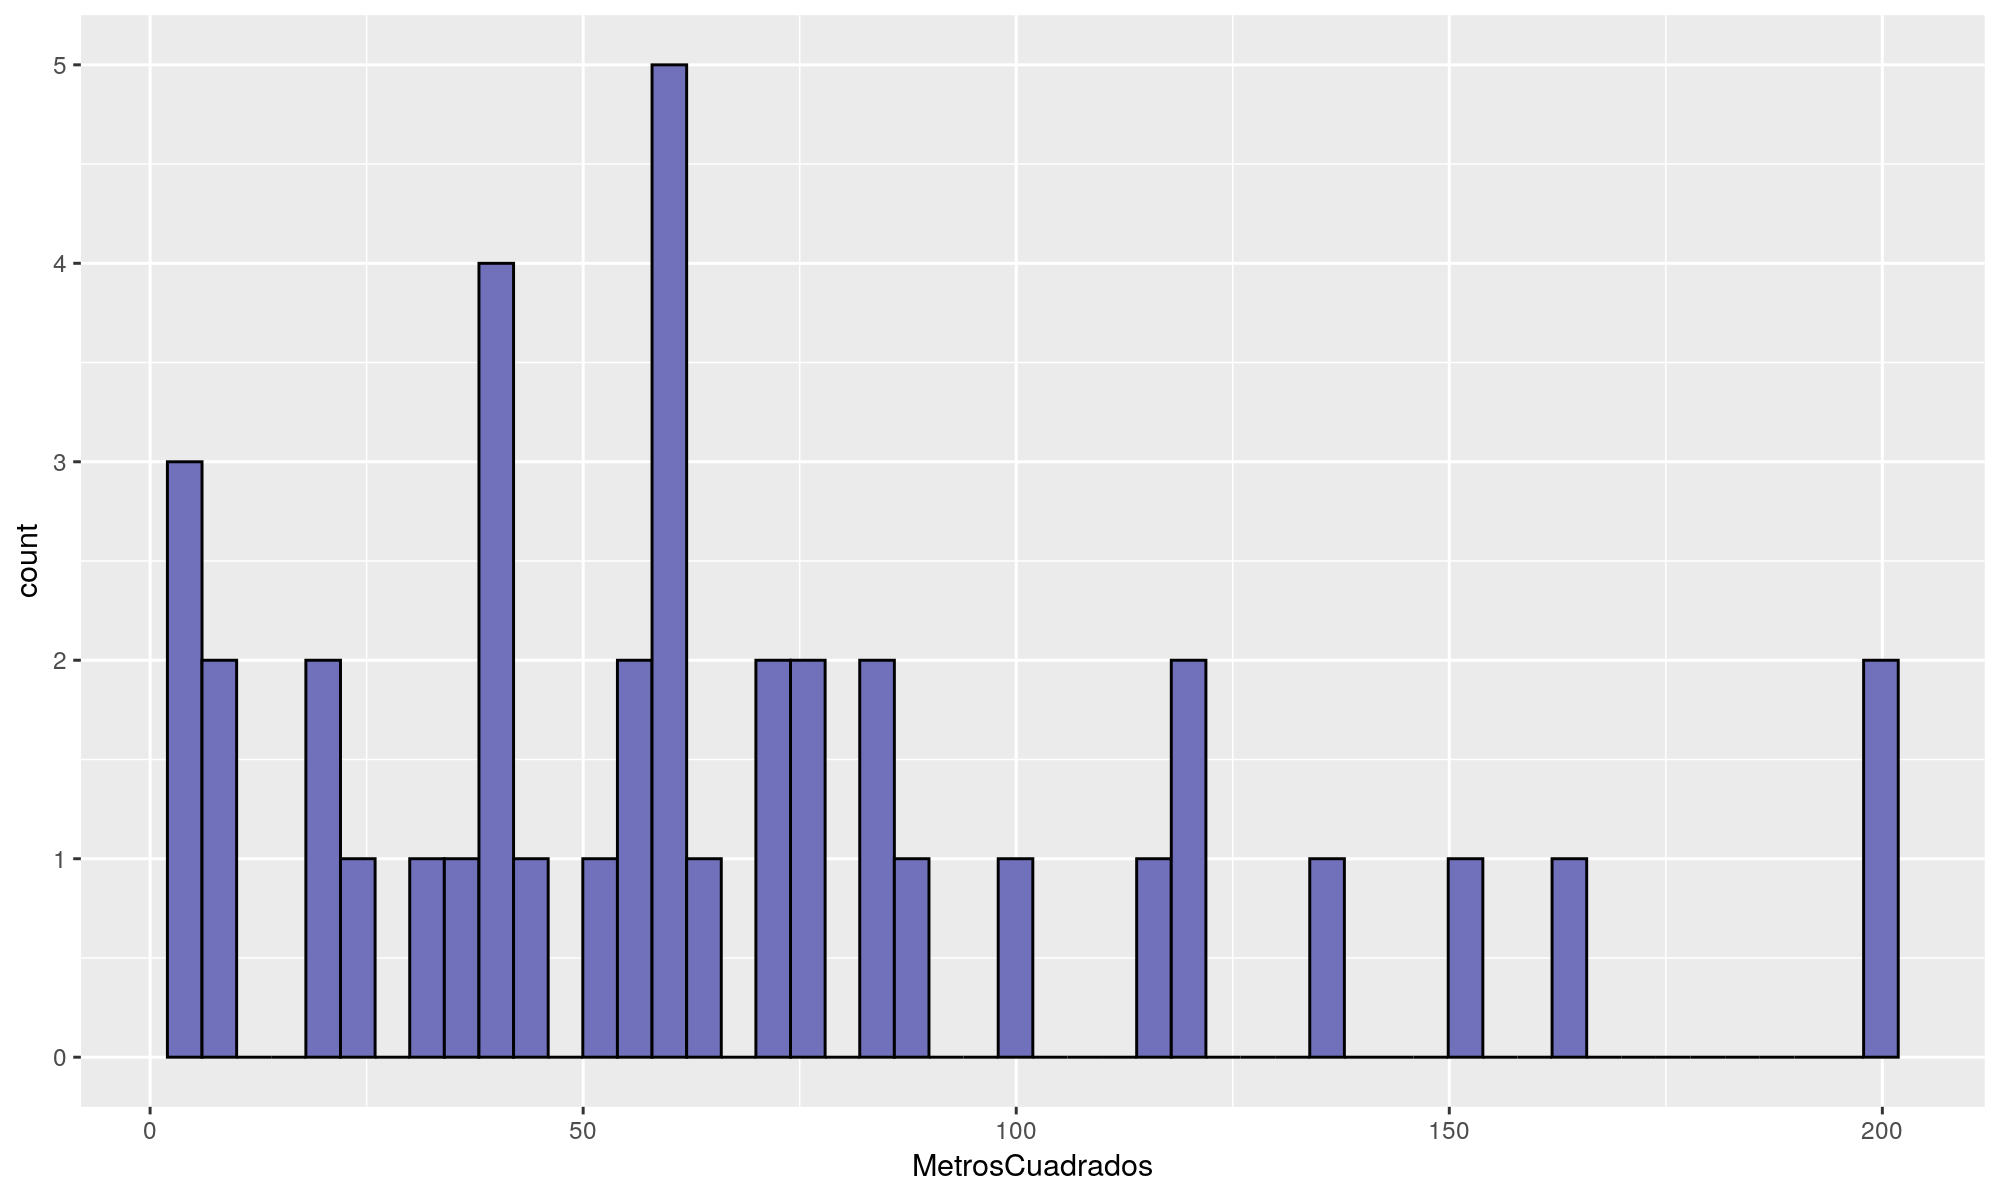

In [363]:
ggplot(data=barrios_sol_filtrado, aes(x=MetrosCuadrados))+
  geom_histogram(bins=50,fill="#7070BB",color="#010101")

#ggplot(data=barrios_sol_filtrado, aes(x=NumDormitorios))+
#  geom_histogram(bins=10,fill="#7070BB",color="#010101")
  

### Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

### ¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

#### De acuerdo a la correlacion de las variables del DataSet del Barrio el sol es 
## NumDormitorios

### Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [307]:
model <- lm(data=barrios_sol_filtrado, formula= Precio ~ MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrios_sol_filtrado)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.175 -21.635  -6.466  20.533 128.270 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      46.5709    10.3852   4.484 6.55e-05 ***
MetrosCuadrados   0.8342     0.1229   6.786 4.80e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.53 on 38 degrees of freedom
Multiple R-squared:  0.5479,	Adjusted R-squared:  0.536 
F-statistic: 46.05 on 1 and 38 DF,  p-value: 4.795e-08


In [308]:
confint(model)

2.5 %      97.5 %   
(Intercept)     25.5471054 67.594737
MetrosCuadrados  0.5853331  1.083027

### Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [309]:
model <- lm(data=barrios_sol_filtrado, formula= Precio ~ NumDormitorios)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrios_sol_filtrado)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.277 -15.644  -4.069  19.931  62.723 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      40.767      7.646   5.332 4.69e-06 ***
NumDormitorios   39.302      3.799  10.344 1.32e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.33 on 38 degrees of freedom
Multiple R-squared:  0.7379,	Adjusted R-squared:  0.731 
F-statistic:   107 on 1 and 38 DF,  p-value: 1.321e-12


In [310]:
confint(model)

2.5 %    97.5 %  
(Intercept)    25.28828 56.24528
NumDormitorios 31.61069 46.99334

### ¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
### ¿Cual es el intervalo de confianza de esa probabilidad?

In [356]:
library(tidyverse)
#library(hablar)

barrios_sol_filtrado <- mutate_at(barrios_sol_filtrado, c("NumDormitorios"), ~replace(., is.na(.), 0))

barrios_sol_filtrado_docmirtorios <- barrios_sol_filtrado %>%
    filter(NumDormitorios > 0 )



p <- 3/length(barrios_sol_filtrado_docmirtorios)
x <- c(barrios_sol_filtrado_docmirtorios["NumDormitorios"])
print(as.integer(x))
#x <- as.integer(x)
#str(x)
#typeof(x)
#x <- as.numeric(x)
#print(p)
#prob <- 1-pbinom(3, size=x, prob=p )
#prob 

ERROR: Error in print(as.integer(x)): 'list' object cannot be coerced to type 'integer'


In [347]:
str(barrios_sol_filtrado_docmirtorios)

'data.frame':	36 obs. of  14 variables:
 $ CodigoPostal   : chr  "28013" "28012" "28013" "28014" ...
 $ Barrio         : chr  "Sol" "Sol" "Sol" "Sol" ...
 $ TipoPropiedad  : chr  "Apartment" "Apartment" "Apartment" "Apartment" ...
 $ TipoAlquiler   : chr  "Entire home/apt" "Entire home/apt" "Entire home/apt" "Entire home/apt" ...
 $ MaxOcupantes   : int  4 4 2 8 4 10 4 2 2 4 ...
 $ NumBanyos      : num  1 1 1 2 1 2 1 1 1 1 ...
 $ NumDormitorios : num  1 1 1 4 1 2 1 1 1 1 ...
 $ NumCamas       : int  1 1 1 5 2 6 2 1 1 1 ...
 $ TipoCama       : chr  "Real Bed" "Real Bed" "Real Bed" "Real Bed" ...
 $ Comodidades    : chr  "TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Fam"| __truncated__ "TV,Cable TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,H"| __truncated__ "TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Fa"| 

In [195]:
pred_conf <- predict(model, barrio_sol, interval='confidence')
head(pred_conf)

fit      lwr      upr     
15 1.111010 1.078605 1.143415
16 1.474939 1.441060 1.508818
17 1.111010 1.078605 1.143415
18 1.474939 1.441060 1.508818
19 1.111010 1.078605 1.143415
21 1.111010 1.078605 1.143415